# Visualizing relationships between pairs of variables

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
sns.set()

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
print(brfss.head())
height = brfss['HTM4']
weight = brfss['WTKG3']

        SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0  


### Plotting graph with height and weight

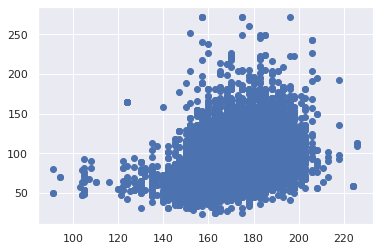

In [3]:
plt.plot(height, weight, 'o')
plt.show()

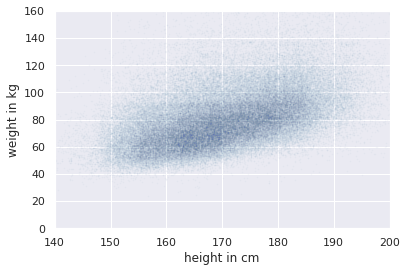

In [4]:
# add jittering(adding noise), lower the markersize and alpha, zoom to make the plot clearer
height_jitter = height + np.random.normal(0,2,size = len(brfss))
weight_jitter = weight + np.random.normal(0,2,size = len(brfss))


plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)
plt.xlabel('height in cm')
plt.ylabel('weight in kg')
plt.axis([140,200,0,160])
plt.show()

### Weight and age

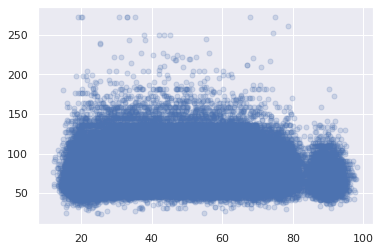

In [5]:
age = brfss['AGE'] + np.random.normal(0,2.5, size = len(brfss))
plt.plot(age, weight,'o', markersize = 5, alpha = 0.2)
plt.show()

#### Violin Plot

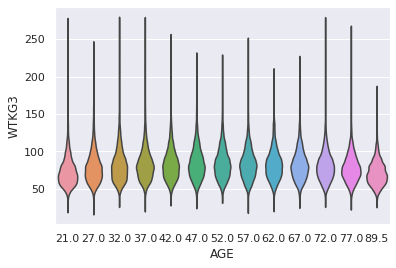

In [6]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x = 'AGE', y='WTKG3', data = data, inner=None)
plt.show()

#### Box plot

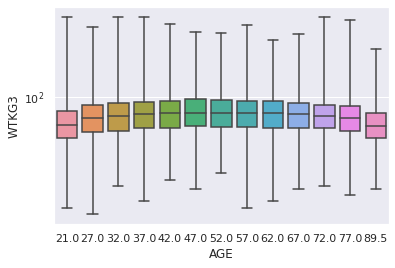

In [7]:
sns.boxplot(x = 'AGE', y= 'WTKG3', data = data, whis=10)
plt.yscale('log')

plt.show()

Looking at the median of boxplot(the middle line in the boxes), people in their 40s are the heaviest while younger and older people are lighter.

### Height and weight

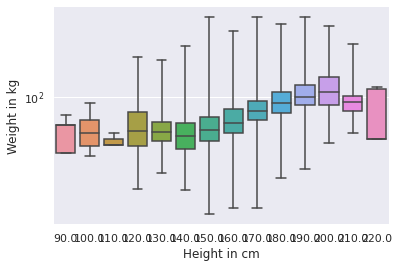

In [8]:
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])


sns.boxplot(x = '_HTMG10',y='WTKG3', data=data, whis=10)

# plot the y axis on a log scale
plt.yscale('log')

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Income and height

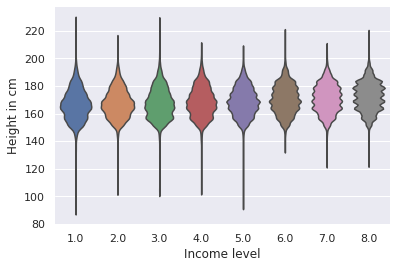

In [9]:
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

sns.violinplot(x='INCOME2',y ='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Correlation coefficient (works only for linear relationships)

In [10]:
subset = brfss[['AGE', 'HTM4', 'WTKG3']]
subset.corr()

,AGE,HTM4,WTKG3
AGE,1.000000,-0.093684,0.021641
HTM4,-0.093684,1.000000,0.474203
WTKG3,0.021641,0.474203,1.000000
